In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
yf.pdr_override()

In [6]:
assets = ['BBAS3.SA', 'ITSA4.SA']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2020-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
pf_data.tail()

,BBAS3.SA,ITSA4.SA
Date,,
2022-05-11,34.290001,8.91
2022-05-12,35.160000,9.06
2022-05-13,35.110001,9.14
2022-05-16,35.110001,9.24
2022-05-17,36.369999,9.42


<AxesSubplot:xlabel='Date'>

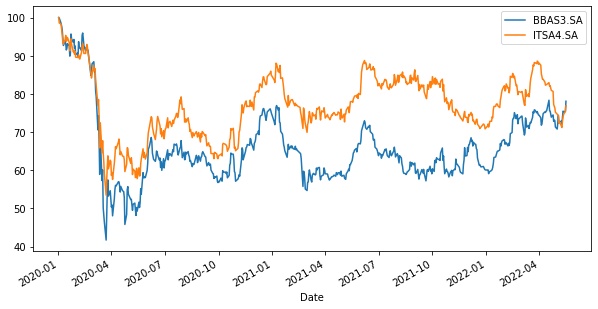

In [8]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [9]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
log_returns.mean() * 250

BBAS3.SA   -0.105421
ITSA4.SA   -0.111854
dtype: float64

In [11]:
log_returns.cov() * 250

,BBAS3.SA,ITSA4.SA
BBAS3.SA,0.217782,0.136716
ITSA4.SA,0.136716,0.121358


In [12]:
log_returns.corr() * 250

,BBAS3.SA,ITSA4.SA
BBAS3.SA,250.000000,210.239639
ITSA4.SA,210.239639,250.000000


In [13]:
num_assets = len(assets)

In [14]:
num_assets

2

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.03775911, 0.96224089])

In [16]:
weights[0] + weights[1]

1.0

In [17]:
np.sum(weights * log_returns.mean()) * 250

-0.11161085864076165

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.12261108632620844

In [19]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.3501586587908522

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([-0.10843832043799312,
  -0.11052772277640235,
  -0.10741901996074783,
  -0.10544706244730492,
  -0.1092746418023413,
  -0.11024652331683402,
  -0.10632376278226649,
  -0.10893174280046858,
  -0.10931768419152975,
  -0.10891680940677338,
  -0.10909262946285907,
  -0.10601631754764802,
  -0.10910322767706855,
  -0.10826100737675476,
  -0.10781773718780141,
  -0.10746083062241579,
  -0.10753355479189403,
  -0.10872160230364901,
  -0.11124691987662465,
  -0.11026964254412586,
  -0.11008217423911393,
  -0.11101366288870212,
  -0.1082165148351971,
  -0.10984248264698618,
  -0.11087269741402657,
  -0.10940130253228317,
  -0.1097169092820575,
  -0.10968766538798176,
  -0.11040144077837438,
  -0.10783514614804872,
  -0.10889868050317845,
  -0.10729001272217334,
  -0.10973985678217271,
  -0.10880929594637156,
  -0.10932820451013738,
  -0.10786843313312149,
  -0.11179805314855623,
  -0.11173316525909885,
  -0.10950468311254397,
  -0.1082845150977115,
  -0.1087938098091487,
  -0.1089049313847194

In [25]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns= np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities) 

pfolio_returns, pfolio_volatilities

(array([-0.10853061, -0.10748374, -0.10649911, -0.11123641, -0.10912666,
        -0.10860836, -0.10976525, -0.10878389, -0.10959466, -0.10949863,
        -0.10865972, -0.10710924, -0.1096054 , -0.10721754, -0.10946165,
        -0.1070889 , -0.11097266, -0.10935163, -0.10720168, -0.10932973,
        -0.10854862, -0.11173746, -0.10723803, -0.10907338, -0.10920584,
        -0.11125545, -0.10982784, -0.11154754, -0.10858787, -0.10758644,
        -0.10830668, -0.10872739, -0.11178311, -0.10689461, -0.10990656,
        -0.10884725, -0.1080574 , -0.10946955, -0.10923103, -0.10808419,
        -0.10837721, -0.11067715, -0.10880665, -0.10885513, -0.11066469,
        -0.10762601, -0.10686068, -0.10587945, -0.10938409, -0.10908109,
        -0.10703544, -0.10905216, -0.11102963, -0.11115484, -0.11153797,
        -0.10702353, -0.10899307, -0.10772265, -0.10841784, -0.10832009,
        -0.11106036, -0.10742627, -0.10694721, -0.10855403, -0.10825   ,
        -0.11060828, -0.1086388 , -0.10776973, -0.1

In [26]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [27]:
portfolios.head()

,Return,Volatility
0,-0.108531,0.393398
1,-0.107484,0.415391
2,-0.106499,0.438699
3,-0.111236,0.353427
4,-0.109127,0.382347


In [28]:
portfolios.tail()

,Return,Volatility
995,-0.107140,0.423253
996,-0.108293,0.398106
997,-0.106327,0.443008
998,-0.108053,0.403053
999,-0.111052,0.355260


Text(0, 0.5, 'Expected Return')

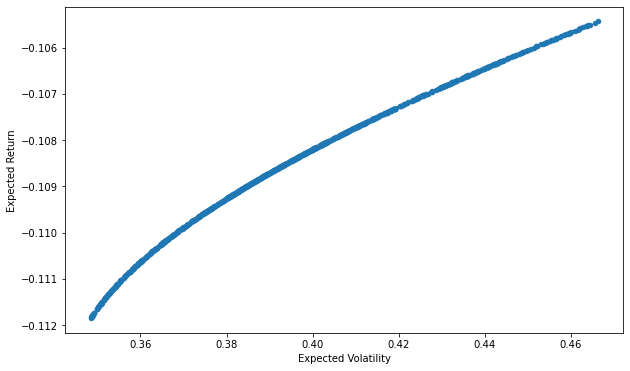

In [30]:
portfolios.plot(x='Volatility', y='Return', kind= 'scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')